In [76]:
import pandas as pd
import numpy as np

In [78]:
data = pd.read_csv("E:\Project\Sentiment Analysis - Restaurant Reviews\Restaurant_Reviews.csv2.csv")

In [80]:
data.shape


(1000, 2)

In [82]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [96]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Data Preprocessing 


In [114]:


#Iporting all the necessary libraries for NLP


import nltk                                     #natural language toolkit for NLP
import re                                       #built-in python package for Regular Expressions
nltk.download('stopwords')                      #nltk corpus is a dump of all kinds of natural language datasets 
from nltk.corpus import stopwords               #stop word for ignoring 
from nltk.stem.porter import PorterStemmer      #porter stemmer is useful in data mining and information retrieval

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
#Cleaning the reviews

corpus = []
for i in range(0,1000):
    
    #re.sub() method performs global search and global research on the given string 
    review = re.sub(pattern = '[^a-zA-Z]', repl=' ', string=data['Review'][i])
    
    #converting entire review into lower case
    review = review.lower()
    
    #tokenizing the review by words
    review_words = review.split()
    
    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    
    #stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    #joining the stemmed words
    review = ' '.join(review)
    
    #creating a corpus
    corpus.append(review)
    
    

In [117]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',


In [118]:
#ceating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer(max_features = 1500)
X =  cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values


Split Data 


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Model Training 


In [130]:
#fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [132]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [146]:
#Accuracy , Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("----Scores----")
print("Accuracy Score is: {}%".format(round(score1*100,2)))
print("Precision Score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

----Scores----
Accuracy Score is: 75.5%
Precision Score is: 75.0%
Recall score is: 78.64%


In [148]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [150]:
cm

array([[70, 27],
       [22, 81]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Values')

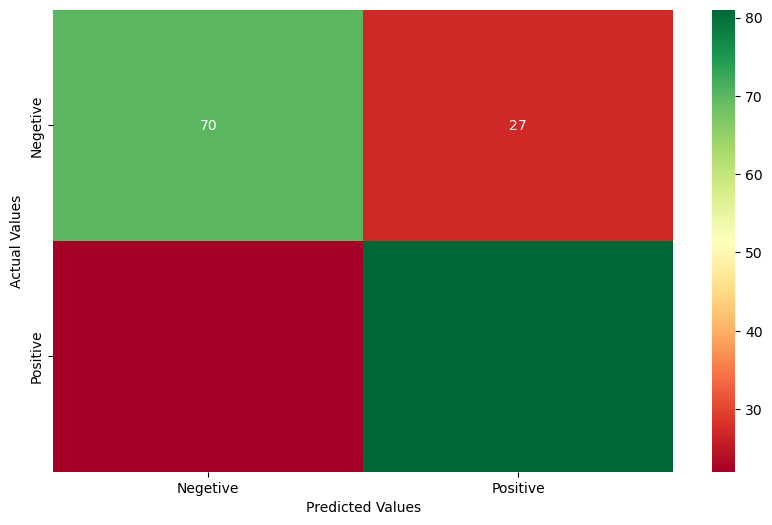

In [170]:
#plotting confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm , annot=True, cmap="RdYlGn", xticklabels=['Negetive','Positive'], yticklabels=['Negetive','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [184]:
#Hyper parameter tuning the NAive byes classifier
best_accuracy = 0.0
alpha_var = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('------------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))
    

Accuracy score for alpha=0.1 is: 77.5%
Accuracy score for alpha=0.2 is: 78.0%
Accuracy score for alpha=0.3 is: 77.5%
Accuracy score for alpha=0.4 is: 77.5%
Accuracy score for alpha=0.5 is: 76.5%
Accuracy score for alpha=0.6 is: 76.5%
Accuracy score for alpha=0.7 is: 76.5%
Accuracy score for alpha=0.8 is: 75.5%
Accuracy score for alpha=0.9 is: 75.5%
Accuracy score for alpha=1.0 is: 75.5%
------------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [186]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

Predictions


In [201]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    
    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [223]:
#Predicting values
sample_review = 'The food is really bad.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGETIVE review!')


This is a NEGETIVE review!


In [205]:
#Predicting values
sample_review = 'food was pretty bad and the sevice was very slow.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGETIVE review!')


This is a NEGETIVE review!


In [211]:
#Predicting values
sample_review = 'The food was absolutely wonderful from preparation to presentation very pleasing.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGETIVE review!')


This is a POSITIVE review.
